In [1]:
import numpy as np
import cv2
from imutils import paths
import sys
sys.path.append("../")
import config

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = config.DATA
imagePaths = list(paths.list_images(data))
imgPath1 = imagePaths[0]
imgPath2 = imagePaths[1]

In [4]:
img1 = cv2.cvtColor(cv2.imread(imgPath1), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(imgPath2), cv2.COLOR_BGR2RGB)

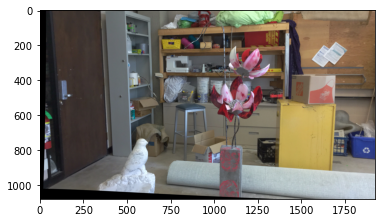

In [5]:
plt.imshow(img1)
plt.show()

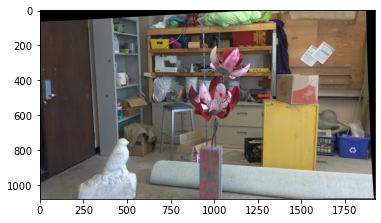

In [6]:
plt.imshow(img2)
plt.show()

In [7]:
sift = cv2.xfeatures2d.SIFT_create()

In [8]:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

In [13]:
print(len(keypoints_1))
print(len(keypoints_2))
print(len(descriptors_1))
print(len(descriptors_2))

3519
3376
3519
3376


In [16]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

In [17]:
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

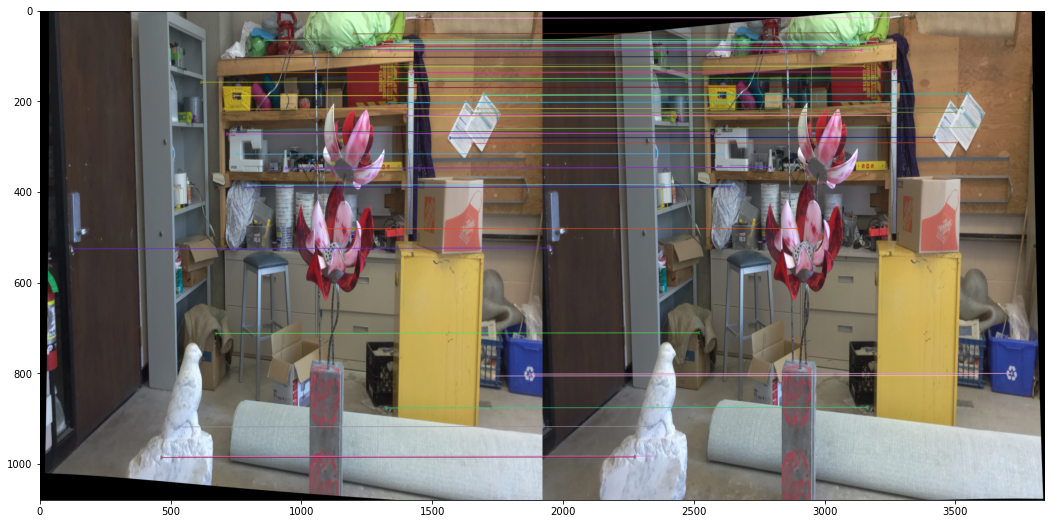

(<matplotlib.image.AxesImage at 0x270edb5c130>, None)

In [22]:
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
fig, ax = plt.subplots(figsize=(18, 9))
ax.imshow(img3, aspect="auto"),plt.show()